# Churn Prediction

Customer attrition or churn, is when customers stop doing business with a company.  It can have a significant impact on a company's revenue and it's crucial for businesses to find out the reasons why customers are leaving and take steps to reduce the number of customers leaving. One way to do this is by identifying customer segments that are at risk of leaving, and implementing retention strategies to keep them. Also, by using data and machine learning techniques, companies can predict which customers are likely to leave in the future and take actions to keep them before they decide to leave.

We are going to build a basic model for predicting customer churn using Telco Customer Churn dataset . We are using some classification algorithm to model customers who have left, using Python tools such as pandas for data manipulation and matplotlib for visualizations.

In [26]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data split and preprocessing
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, auc, roc_auc_score

# ML algorithem
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# set seed
SEED = 123
# filtering warnings
import warnings
warnings.filterwarnings("ignore")

# clear larg output
from IPython.display import clear_output


In [27]:
! ls

Churn Prediction.ipynb
WA_Fn-UseC_-Telco-Customer-Churn.csv
catboost_info


In [66]:
# import data set
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data explanation
1. customerID=========> Customer identification number
2. gender=============> Customer gender
3. SeniorCitizen======> Does the customer is a SeniorCitizen or not? (0: No , 1: Yes)
4. Partner============> Does the customer have partner or not? (0: No , 1: Yes)
5. Dependents=========> Does the customer have partner or not? (0: No , 1: Yes)
6. tenure=============> number of mounths the costomer has stayed with the company
7. PhoneService=======> Does the customer have PhoneService or not? (No , Yes)
8. MultipleLines======> Does the customer have MultipleLines or not? (Yes, No or No phone service)
9. InternetService====> Does the customer have InternetService or not?(Fiber optic, DSL or No )
10. OnlineSecurity====> Does the customer have OnlineSecurity or not? (Yes, No or No internet service)
11. OnlineBackup======> Does the customer have OnlineBackup or not? (Yes, No or No internet service)
12. DeviceProtection==> Does the customer have DeviceProtection or not? (Yes, No or No internet service)
13. TechSupport=======> Does the customer have TechSupport or not? (Yes, No or No internet service)
14. StreamingTV=======> Does the customer have StreamingTV or not? (Yes, No or No internet service)
15. StreamingMovies===> Does the customer have StreamingMovies or not? (Yes, No or No internet service)
16. Contract==========> Types of contract (Month-to-month, Two year, One year)
17. PaperlessBilling==> Does the customer have Paperless Billing or not? (Yes, No)
18. PaymentMethod=====> Types of Payment Method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges====> The amount charged to the customer in monthly
20. TotalCharges======> The total amount charged to the customer
21. Churn=============> Is the customer churned? (Yes, No) ( Traget variable)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
# descriptive of dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [69]:
df.describe(include="O")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### recognize type of features 
[  numeric features  and object (categorical. nominal) features]

In [70]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [71]:
df.select_dtypes("O").columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [72]:
# Number of customer churn
df.groupby("Churn").size()

Churn
No     5174
Yes    1869
dtype: int64

In [73]:
# percentage of customer that are leaving
df.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

<AxesSubplot: xlabel='Churn', ylabel='count'>

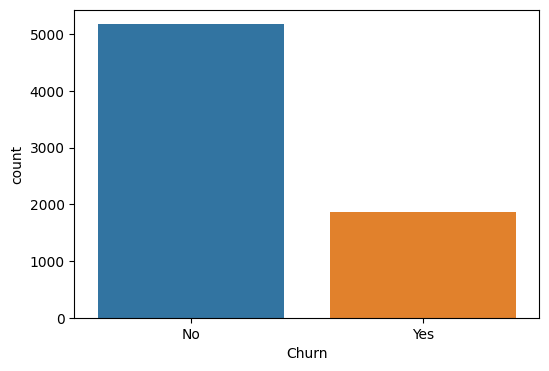

In [74]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x= "Churn")

### You can see that the percentage of leaving for this company is 26%.
Without doing anything special, 74% of customers stay with the company, so we need to build a model that scores higher than 74%

In [75]:
# Gender of customer
df.groupby("gender").size()

gender
Female    3488
Male      3555
dtype: int64

In [76]:
# Customer churn by gender
df.groupby(["gender","Churn"]).size().reset_index()

,gender,Churn,0
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


<AxesSubplot: xlabel='gender', ylabel='count'>

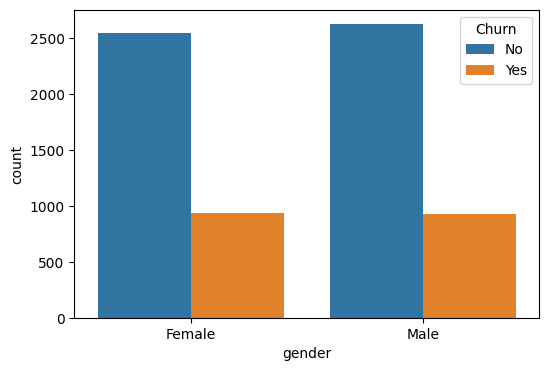

In [77]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x ="gender" ,hue = "Churn")

In [78]:
# churn count for intenet servise
df.groupby(["Churn", "InternetService"]).size()

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    DSL                 459
       Fiber optic        1297
       No                  113
dtype: int64

<AxesSubplot: xlabel='Churn', ylabel='count'>

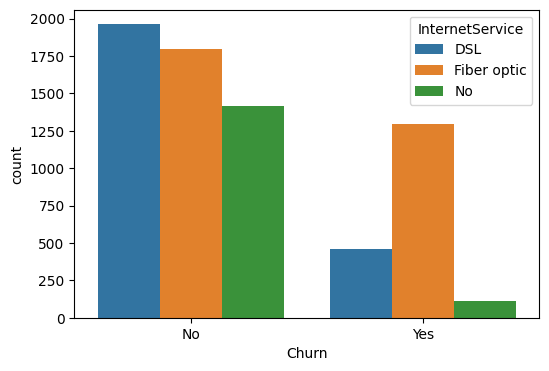

In [79]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x ="Churn" , hue="InternetService")

### Oboservations
1. customer who stay with company almost use DSL.
2. customer who  churn mostly used Fiber Optic.

<AxesSubplot: xlabel='Churn', ylabel='count'>

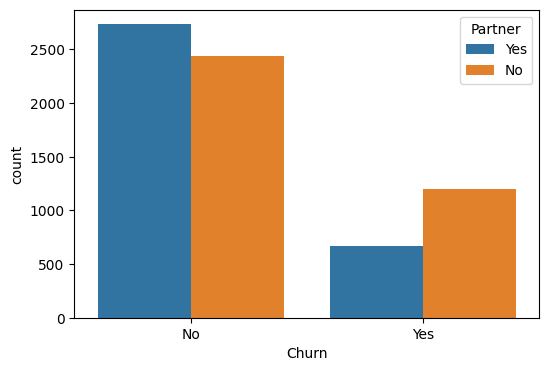

In [80]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x = "Churn", hue = "Partner")

## Observation
1.  The Cuatomer who often left the company almost did not have a partner.

In [81]:
# Distribution of numeric columns for churn

array([<AxesSubplot: title={'center': 'tenure'}>,
       <AxesSubplot: title={'center': 'MonthlyCharges'}>], dtype=object)

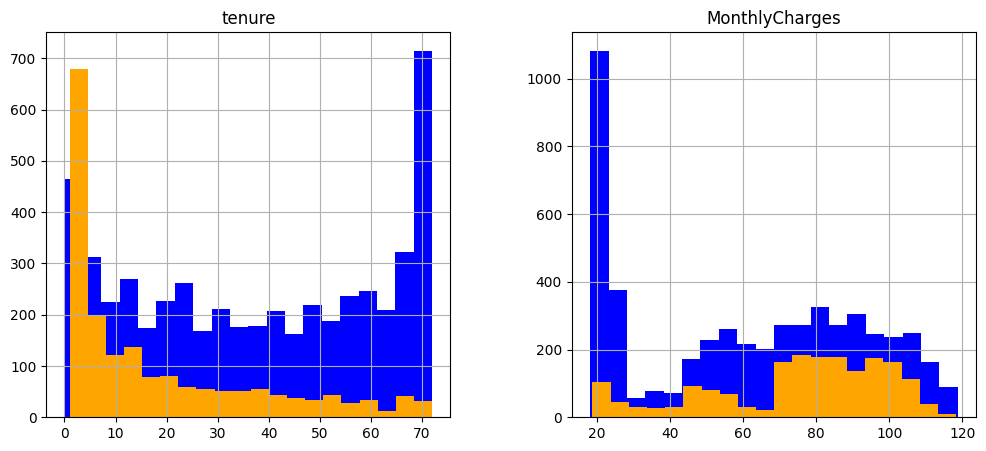

In [82]:
num_features = ["tenure", "MonthlyCharges"]
fig, ax = plt.subplots(1 , 2, figsize= (12,5))
df[df["Churn"]=="No"][num_features].hist(bins= 20, color = "blue", ax= ax)
df[df["Churn"]=="Yes"][num_features].hist(bins= 20, color = "orange", ax= ax)

### Observation 
#### The result shows that churn customers end up leaving the company up to 10 months later, and they often pay less than 100 dollar a month.

<AxesSubplot: xlabel='Churn', ylabel='count'>

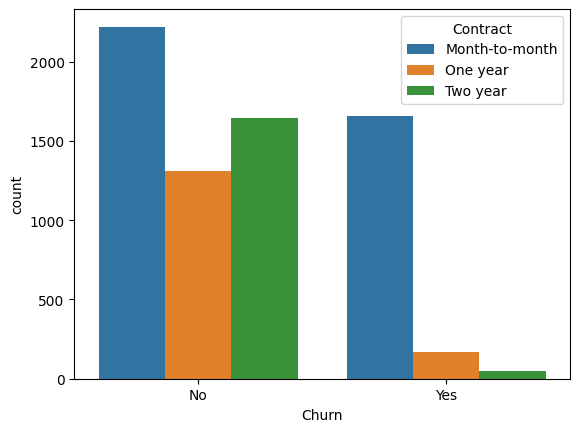

In [83]:
# Churn count for Contract types
sns.countplot(data=df, x= "Churn" , hue = "Contract")

## Data preprocessing

In [84]:
# remove unnecessary coulmns
df.drop("customerID", axis=1, inplace=True)

In [85]:
# checking  null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [86]:
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [87]:
### There are 11 values in the Totalcharges that have ' ', so we reaplace it with np.NaN

In [88]:
df["TotalCharges"]=df["TotalCharges"].replace(' ',np.NaN)

In [89]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [90]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [91]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [92]:
df["TotalCharges"] = df["TotalCharges"].astype("float64")

In [93]:
# Convert all of the non-numeric to numeric
for column in df.columns:
    if df[column].dtypes == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [94]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [95]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [97]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [98]:
# Scaling the data set
st = StandardScaler()
df_st = st.fit_transform(X)

In [38]:
# Scaling the data set
scale_col = ["tenure", "MonthlyCharges", "TotalCharges"]
norm = Normalizer()
df[scale_col] = norm.fit_transform(df[scale_col])

In [99]:
X = pd.DataFrame(df_st)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994242
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173244
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.959674
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.194766
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.940470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.128655
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,2.243151
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.854469
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.872062


In [61]:
df = df_st.copy()

In [62]:
# Data split

In [100]:
X_train, X_val , y_train , y_val = train_test_split(X, y , train_size=0.8 , random_state=SEED)
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=SEED)

## Logestic regression

In [101]:
logr = LogisticRegression(random_state=SEED)
cv = cross_validate(logr , X_train, y_train, cv =skf , scoring="accuracy", return_estimator=True)
model_logr = cv["estimator"]

In [102]:
y_hats = [model.predict(X_val) for model in model_logr]
y_hats
acc = np.mean([accuracy_score(y_hat, y_val) for y_hat in y_hats])
print( "accuracy of Logestic regression is :",acc )

accuracy of Logestic regression is : 0.8115177937747136


## Light Gradiant Boosting Model

In [103]:
lgbm = LGBMClassifier(random_state=SEED)
cv = cross_validate(lgbm , X_train, y_train, cv =skf , scoring="accuracy", return_estimator=True)
model_lgbm = cv["estimator"]

In [104]:
y_hats = [model.predict(X_val) for model in model_lgbm]
acc = np.mean([accuracy_score(y_hat, y_val) for y_hat in y_hats])
print( "accuracy of LGBM is :",acc )

accuracy of LGBM is : 0.7973233296157357


## eXterme Gradiant Boosting

In [105]:
xgb  = XGBClassifier(random_state=SEED)
cv = cross_validate(xgb, X_train, y_train, cv =skf , scoring="accuracy", return_estimator=True)
model_xgb = cv["estimator"]

In [106]:
y_hats = [model.predict(X_val) for model in model_xgb]
acc = np.mean([accuracy_score(y_hat, y_val) for y_hat in y_hats])
print( "accuracy of XGB is :",acc )

accuracy of XGB is : 0.7901247085065395


## CatBoost

In [115]:
cat = CatBoostClassifier(random_state=SEED)
cv = cross_validate(cat, X_train, y_train, cv =skf , scoring="accuracy", return_estimator=True)
model_cat = cv["estimator"]
clear_output(wait=True)

Learning rate set to 0.020181
0:	learn: 0.6793100	total: 4.28ms	remaining: 4.27s
1:	learn: 0.6653413	total: 8.16ms	remaining: 4.07s
2:	learn: 0.6553835	total: 11.2ms	remaining: 3.73s
3:	learn: 0.6429114	total: 15.5ms	remaining: 3.85s
4:	learn: 0.6304872	total: 20ms	remaining: 3.99s
5:	learn: 0.6214049	total: 23.3ms	remaining: 3.86s
6:	learn: 0.6115950	total: 32.8ms	remaining: 4.65s
7:	learn: 0.6015242	total: 37.3ms	remaining: 4.63s
8:	learn: 0.5928592	total: 41.1ms	remaining: 4.52s
9:	learn: 0.5839049	total: 45.5ms	remaining: 4.51s
10:	learn: 0.5760063	total: 49.3ms	remaining: 4.43s
11:	learn: 0.5678919	total: 53.3ms	remaining: 4.38s
12:	learn: 0.5613430	total: 56.8ms	remaining: 4.31s
13:	learn: 0.5540027	total: 61.5ms	remaining: 4.33s
14:	learn: 0.5490437	total: 64.1ms	remaining: 4.21s
15:	learn: 0.5426185	total: 67.7ms	remaining: 4.16s
16:	learn: 0.5365150	total: 71.7ms	remaining: 4.14s
17:	learn: 0.5308470	total: 75.8ms	remaining: 4.13s
18:	learn: 0.5258123	total: 79.8ms	remaining: 

207:	learn: 0.3802722	total: 814ms	remaining: 3.1s
208:	learn: 0.3802551	total: 817ms	remaining: 3.09s
209:	learn: 0.3801309	total: 821ms	remaining: 3.09s
210:	learn: 0.3799812	total: 825ms	remaining: 3.08s
211:	learn: 0.3797763	total: 829ms	remaining: 3.08s
212:	learn: 0.3796614	total: 833ms	remaining: 3.08s
213:	learn: 0.3794995	total: 838ms	remaining: 3.08s
214:	learn: 0.3793847	total: 842ms	remaining: 3.07s
215:	learn: 0.3791585	total: 846ms	remaining: 3.07s
216:	learn: 0.3791437	total: 848ms	remaining: 3.06s
217:	learn: 0.3790166	total: 851ms	remaining: 3.05s
218:	learn: 0.3788617	total: 856ms	remaining: 3.05s
219:	learn: 0.3786703	total: 860ms	remaining: 3.05s
220:	learn: 0.3785258	total: 863ms	remaining: 3.04s
221:	learn: 0.3783357	total: 867ms	remaining: 3.04s
222:	learn: 0.3781025	total: 871ms	remaining: 3.04s
223:	learn: 0.3779244	total: 875ms	remaining: 3.03s
224:	learn: 0.3777840	total: 879ms	remaining: 3.03s
225:	learn: 0.3777044	total: 883ms	remaining: 3.02s
226:	learn: 0

409:	learn: 0.3529494	total: 1.6s	remaining: 2.31s
410:	learn: 0.3528494	total: 1.61s	remaining: 2.3s
411:	learn: 0.3527358	total: 1.61s	remaining: 2.3s
412:	learn: 0.3526435	total: 1.62s	remaining: 2.3s
413:	learn: 0.3525793	total: 1.62s	remaining: 2.3s
414:	learn: 0.3524756	total: 1.63s	remaining: 2.29s
415:	learn: 0.3523425	total: 1.63s	remaining: 2.29s
416:	learn: 0.3522068	total: 1.64s	remaining: 2.29s
417:	learn: 0.3520216	total: 1.64s	remaining: 2.28s
418:	learn: 0.3518613	total: 1.64s	remaining: 2.28s
419:	learn: 0.3517660	total: 1.65s	remaining: 2.27s
420:	learn: 0.3516444	total: 1.65s	remaining: 2.27s
421:	learn: 0.3514911	total: 1.66s	remaining: 2.27s
422:	learn: 0.3513168	total: 1.66s	remaining: 2.26s
423:	learn: 0.3511531	total: 1.66s	remaining: 2.26s
424:	learn: 0.3510419	total: 1.67s	remaining: 2.25s
425:	learn: 0.3508885	total: 1.67s	remaining: 2.25s
426:	learn: 0.3507762	total: 1.67s	remaining: 2.25s
427:	learn: 0.3505030	total: 1.68s	remaining: 2.24s
428:	learn: 0.350

602:	learn: 0.3294327	total: 2.39s	remaining: 1.57s
603:	learn: 0.3293506	total: 2.39s	remaining: 1.57s
604:	learn: 0.3292443	total: 2.4s	remaining: 1.56s
605:	learn: 0.3291321	total: 2.4s	remaining: 1.56s
606:	learn: 0.3290303	total: 2.4s	remaining: 1.56s
607:	learn: 0.3289382	total: 2.41s	remaining: 1.55s
608:	learn: 0.3288692	total: 2.41s	remaining: 1.55s
609:	learn: 0.3287559	total: 2.42s	remaining: 1.54s
610:	learn: 0.3286553	total: 2.42s	remaining: 1.54s
611:	learn: 0.3285485	total: 2.43s	remaining: 1.54s
612:	learn: 0.3284439	total: 2.43s	remaining: 1.54s
613:	learn: 0.3283881	total: 2.44s	remaining: 1.53s
614:	learn: 0.3283090	total: 2.44s	remaining: 1.53s
615:	learn: 0.3282497	total: 2.44s	remaining: 1.52s
616:	learn: 0.3281862	total: 2.45s	remaining: 1.52s
617:	learn: 0.3280788	total: 2.45s	remaining: 1.52s
618:	learn: 0.3279858	total: 2.46s	remaining: 1.51s
619:	learn: 0.3278953	total: 2.46s	remaining: 1.51s
620:	learn: 0.3278252	total: 2.47s	remaining: 1.5s
621:	learn: 0.32

805:	learn: 0.3090272	total: 3.17s	remaining: 764ms
806:	learn: 0.3088678	total: 3.18s	remaining: 760ms
807:	learn: 0.3087335	total: 3.18s	remaining: 756ms
808:	learn: 0.3086521	total: 3.19s	remaining: 753ms
809:	learn: 0.3085750	total: 3.19s	remaining: 749ms
810:	learn: 0.3084513	total: 3.19s	remaining: 745ms
811:	learn: 0.3083844	total: 3.2s	remaining: 741ms
812:	learn: 0.3083643	total: 3.2s	remaining: 737ms
813:	learn: 0.3082926	total: 3.21s	remaining: 733ms
814:	learn: 0.3081898	total: 3.21s	remaining: 729ms
815:	learn: 0.3080539	total: 3.21s	remaining: 725ms
816:	learn: 0.3079772	total: 3.22s	remaining: 721ms
817:	learn: 0.3079114	total: 3.22s	remaining: 717ms
818:	learn: 0.3078375	total: 3.23s	remaining: 713ms
819:	learn: 0.3077807	total: 3.23s	remaining: 709ms
820:	learn: 0.3077197	total: 3.23s	remaining: 705ms
821:	learn: 0.3076719	total: 3.24s	remaining: 701ms
822:	learn: 0.3075637	total: 3.24s	remaining: 697ms
823:	learn: 0.3075115	total: 3.25s	remaining: 693ms
824:	learn: 0.

Learning rate set to 0.020181
0:	learn: 0.6790492	total: 4.48ms	remaining: 4.48s
1:	learn: 0.6652342	total: 8.22ms	remaining: 4.1s
2:	learn: 0.6549765	total: 10.9ms	remaining: 3.61s
3:	learn: 0.6432961	total: 14.7ms	remaining: 3.67s
4:	learn: 0.6307680	total: 18.5ms	remaining: 3.69s
5:	learn: 0.6215711	total: 21.2ms	remaining: 3.51s
6:	learn: 0.6119469	total: 25ms	remaining: 3.54s
7:	learn: 0.6019166	total: 28.8ms	remaining: 3.57s
8:	learn: 0.5927231	total: 32.6ms	remaining: 3.58s
9:	learn: 0.5841127	total: 36.4ms	remaining: 3.6s
10:	learn: 0.5761905	total: 40.2ms	remaining: 3.61s
11:	learn: 0.5682849	total: 44ms	remaining: 3.62s
12:	learn: 0.5608757	total: 47.7ms	remaining: 3.62s
13:	learn: 0.5551629	total: 50ms	remaining: 3.52s
14:	learn: 0.5482314	total: 53.8ms	remaining: 3.53s
15:	learn: 0.5415921	total: 57.5ms	remaining: 3.54s
16:	learn: 0.5353338	total: 61.3ms	remaining: 3.54s
17:	learn: 0.5299573	total: 65.1ms	remaining: 3.55s
18:	learn: 0.5243033	total: 68.7ms	remaining: 3.54s


208:	learn: 0.3763125	total: 788ms	remaining: 2.98s
209:	learn: 0.3761486	total: 792ms	remaining: 2.98s
210:	learn: 0.3759965	total: 796ms	remaining: 2.98s
211:	learn: 0.3758066	total: 800ms	remaining: 2.97s
212:	learn: 0.3755796	total: 804ms	remaining: 2.97s
213:	learn: 0.3754257	total: 808ms	remaining: 2.97s
214:	learn: 0.3752422	total: 812ms	remaining: 2.97s
215:	learn: 0.3750863	total: 817ms	remaining: 2.96s
216:	learn: 0.3748957	total: 820ms	remaining: 2.96s
217:	learn: 0.3746330	total: 824ms	remaining: 2.96s
218:	learn: 0.3745360	total: 828ms	remaining: 2.95s
219:	learn: 0.3742926	total: 832ms	remaining: 2.95s
220:	learn: 0.3741239	total: 836ms	remaining: 2.95s
221:	learn: 0.3739982	total: 840ms	remaining: 2.94s
222:	learn: 0.3738415	total: 844ms	remaining: 2.94s
223:	learn: 0.3736462	total: 848ms	remaining: 2.94s
224:	learn: 0.3735001	total: 852ms	remaining: 2.93s
225:	learn: 0.3733199	total: 855ms	remaining: 2.93s
226:	learn: 0.3731847	total: 859ms	remaining: 2.92s
227:	learn: 

418:	learn: 0.3475322	total: 1.58s	remaining: 2.19s
419:	learn: 0.3473984	total: 1.58s	remaining: 2.19s
420:	learn: 0.3472581	total: 1.59s	remaining: 2.18s
421:	learn: 0.3470832	total: 1.59s	remaining: 2.18s
422:	learn: 0.3469626	total: 1.6s	remaining: 2.18s
423:	learn: 0.3468775	total: 1.6s	remaining: 2.17s
424:	learn: 0.3467226	total: 1.6s	remaining: 2.17s
425:	learn: 0.3465457	total: 1.61s	remaining: 2.17s
426:	learn: 0.3464390	total: 1.61s	remaining: 2.16s
427:	learn: 0.3462438	total: 1.62s	remaining: 2.16s
428:	learn: 0.3461340	total: 1.62s	remaining: 2.16s
429:	learn: 0.3460742	total: 1.62s	remaining: 2.15s
430:	learn: 0.3459494	total: 1.63s	remaining: 2.15s
431:	learn: 0.3458147	total: 1.63s	remaining: 2.14s
432:	learn: 0.3456408	total: 1.63s	remaining: 2.14s
433:	learn: 0.3454679	total: 1.64s	remaining: 2.14s
434:	learn: 0.3453399	total: 1.64s	remaining: 2.13s
435:	learn: 0.3452326	total: 1.65s	remaining: 2.13s
436:	learn: 0.3451162	total: 1.65s	remaining: 2.13s
437:	learn: 0.3

577:	learn: 0.3279965	total: 2.19s	remaining: 1.59s
578:	learn: 0.3279043	total: 2.19s	remaining: 1.59s
579:	learn: 0.3277263	total: 2.19s	remaining: 1.59s
580:	learn: 0.3276222	total: 2.2s	remaining: 1.58s
581:	learn: 0.3274927	total: 2.2s	remaining: 1.58s
582:	learn: 0.3273619	total: 2.21s	remaining: 1.58s
583:	learn: 0.3272898	total: 2.21s	remaining: 1.57s
584:	learn: 0.3271940	total: 2.21s	remaining: 1.57s
585:	learn: 0.3270675	total: 2.22s	remaining: 1.57s
586:	learn: 0.3269560	total: 2.22s	remaining: 1.56s
587:	learn: 0.3268635	total: 2.22s	remaining: 1.56s
588:	learn: 0.3267609	total: 2.23s	remaining: 1.55s
589:	learn: 0.3266660	total: 2.23s	remaining: 1.55s
590:	learn: 0.3265691	total: 2.24s	remaining: 1.55s
591:	learn: 0.3264593	total: 2.24s	remaining: 1.54s
592:	learn: 0.3263979	total: 2.24s	remaining: 1.54s
593:	learn: 0.3262858	total: 2.25s	remaining: 1.54s
594:	learn: 0.3261744	total: 2.25s	remaining: 1.53s
595:	learn: 0.3260420	total: 2.25s	remaining: 1.53s
596:	learn: 0.

783:	learn: 0.3065099	total: 2.98s	remaining: 820ms
784:	learn: 0.3064043	total: 2.98s	remaining: 816ms
785:	learn: 0.3062638	total: 2.98s	remaining: 813ms
786:	learn: 0.3061858	total: 2.99s	remaining: 809ms
787:	learn: 0.3060419	total: 2.99s	remaining: 805ms
788:	learn: 0.3059371	total: 3s	remaining: 802ms
789:	learn: 0.3057922	total: 3s	remaining: 798ms
790:	learn: 0.3056411	total: 3s	remaining: 794ms
791:	learn: 0.3055251	total: 3.01s	remaining: 790ms
792:	learn: 0.3053641	total: 3.01s	remaining: 786ms
793:	learn: 0.3052960	total: 3.02s	remaining: 783ms
794:	learn: 0.3052406	total: 3.02s	remaining: 779ms
795:	learn: 0.3051557	total: 3.02s	remaining: 775ms
796:	learn: 0.3050491	total: 3.03s	remaining: 771ms
797:	learn: 0.3049862	total: 3.03s	remaining: 767ms
798:	learn: 0.3048906	total: 3.04s	remaining: 764ms
799:	learn: 0.3048105	total: 3.04s	remaining: 760ms
800:	learn: 0.3047553	total: 3.04s	remaining: 756ms
801:	learn: 0.3046493	total: 3.05s	remaining: 752ms
802:	learn: 0.3045695

991:	learn: 0.2881277	total: 3.77s	remaining: 30.4ms
992:	learn: 0.2880643	total: 3.77s	remaining: 26.6ms
993:	learn: 0.2879480	total: 3.78s	remaining: 22.8ms
994:	learn: 0.2878988	total: 3.78s	remaining: 19ms
995:	learn: 0.2878149	total: 3.78s	remaining: 15.2ms
996:	learn: 0.2877179	total: 3.79s	remaining: 11.4ms
997:	learn: 0.2876271	total: 3.79s	remaining: 7.6ms
998:	learn: 0.2875250	total: 3.8s	remaining: 3.8ms
999:	learn: 0.2874703	total: 3.8s	remaining: 0us
Learning rate set to 0.020181
0:	learn: 0.6793464	total: 7.52ms	remaining: 7.52s
1:	learn: 0.6662338	total: 13.3ms	remaining: 6.62s
2:	learn: 0.6558625	total: 16.4ms	remaining: 5.47s
3:	learn: 0.6448327	total: 20.7ms	remaining: 5.17s
4:	learn: 0.6324563	total: 24.7ms	remaining: 4.91s
5:	learn: 0.6235015	total: 27.4ms	remaining: 4.53s
6:	learn: 0.6130248	total: 31.1ms	remaining: 4.41s
7:	learn: 0.6047677	total: 33.8ms	remaining: 4.19s
8:	learn: 0.5952407	total: 37.4ms	remaining: 4.12s
9:	learn: 0.5873272	total: 41ms	remaining: 

177:	learn: 0.3825196	total: 698ms	remaining: 3.22s
178:	learn: 0.3824069	total: 703ms	remaining: 3.23s
179:	learn: 0.3821821	total: 707ms	remaining: 3.22s
180:	learn: 0.3818206	total: 711ms	remaining: 3.22s
181:	learn: 0.3815771	total: 715ms	remaining: 3.21s
182:	learn: 0.3814134	total: 719ms	remaining: 3.21s
183:	learn: 0.3812375	total: 724ms	remaining: 3.21s
184:	learn: 0.3809694	total: 728ms	remaining: 3.21s
185:	learn: 0.3808230	total: 732ms	remaining: 3.2s
186:	learn: 0.3806068	total: 736ms	remaining: 3.2s
187:	learn: 0.3804567	total: 740ms	remaining: 3.19s
188:	learn: 0.3802986	total: 743ms	remaining: 3.19s
189:	learn: 0.3801792	total: 747ms	remaining: 3.19s
190:	learn: 0.3798919	total: 751ms	remaining: 3.18s
191:	learn: 0.3797180	total: 755ms	remaining: 3.18s
192:	learn: 0.3795749	total: 759ms	remaining: 3.17s
193:	learn: 0.3793718	total: 762ms	remaining: 3.17s
194:	learn: 0.3791373	total: 766ms	remaining: 3.16s
195:	learn: 0.3790227	total: 770ms	remaining: 3.16s
196:	learn: 0.

387:	learn: 0.3519968	total: 1.5s	remaining: 2.36s
388:	learn: 0.3518494	total: 1.5s	remaining: 2.35s
389:	learn: 0.3517036	total: 1.5s	remaining: 2.35s
390:	learn: 0.3515594	total: 1.51s	remaining: 2.35s
391:	learn: 0.3513860	total: 1.51s	remaining: 2.34s
392:	learn: 0.3512280	total: 1.51s	remaining: 2.34s
393:	learn: 0.3510613	total: 1.52s	remaining: 2.34s
394:	learn: 0.3509678	total: 1.52s	remaining: 2.33s
395:	learn: 0.3508757	total: 1.53s	remaining: 2.33s
396:	learn: 0.3507693	total: 1.53s	remaining: 2.33s
397:	learn: 0.3506541	total: 1.53s	remaining: 2.32s
398:	learn: 0.3505594	total: 1.54s	remaining: 2.32s
399:	learn: 0.3504892	total: 1.54s	remaining: 2.31s
400:	learn: 0.3503922	total: 1.55s	remaining: 2.31s
401:	learn: 0.3502929	total: 1.55s	remaining: 2.31s
402:	learn: 0.3501773	total: 1.55s	remaining: 2.3s
403:	learn: 0.3499665	total: 1.56s	remaining: 2.3s
404:	learn: 0.3498860	total: 1.56s	remaining: 2.29s
405:	learn: 0.3496449	total: 1.56s	remaining: 2.29s
406:	learn: 0.349

597:	learn: 0.3253987	total: 2.28s	remaining: 1.53s
598:	learn: 0.3253361	total: 2.29s	remaining: 1.53s
599:	learn: 0.3252273	total: 2.29s	remaining: 1.53s
600:	learn: 0.3250700	total: 2.29s	remaining: 1.52s
601:	learn: 0.3248725	total: 2.3s	remaining: 1.52s
602:	learn: 0.3247516	total: 2.3s	remaining: 1.52s
603:	learn: 0.3246386	total: 2.31s	remaining: 1.51s
604:	learn: 0.3245358	total: 2.31s	remaining: 1.51s
605:	learn: 0.3244506	total: 2.32s	remaining: 1.51s
606:	learn: 0.3242476	total: 2.32s	remaining: 1.5s
607:	learn: 0.3241508	total: 2.33s	remaining: 1.5s
608:	learn: 0.3239967	total: 2.33s	remaining: 1.5s
609:	learn: 0.3239180	total: 2.33s	remaining: 1.49s
610:	learn: 0.3237947	total: 2.34s	remaining: 1.49s
611:	learn: 0.3236870	total: 2.34s	remaining: 1.49s
612:	learn: 0.3236005	total: 2.35s	remaining: 1.48s
613:	learn: 0.3234375	total: 2.35s	remaining: 1.48s
614:	learn: 0.3233279	total: 2.35s	remaining: 1.47s
615:	learn: 0.3231792	total: 2.36s	remaining: 1.47s
616:	learn: 0.323

804:	learn: 0.3032905	total: 3.07s	remaining: 744ms
805:	learn: 0.3032284	total: 3.08s	remaining: 740ms
806:	learn: 0.3031443	total: 3.08s	remaining: 736ms
807:	learn: 0.3031027	total: 3.08s	remaining: 733ms
808:	learn: 0.3030221	total: 3.09s	remaining: 729ms
809:	learn: 0.3029611	total: 3.09s	remaining: 725ms
810:	learn: 0.3028726	total: 3.09s	remaining: 721ms
811:	learn: 0.3028065	total: 3.1s	remaining: 717ms
812:	learn: 0.3027353	total: 3.1s	remaining: 714ms
813:	learn: 0.3025938	total: 3.11s	remaining: 710ms
814:	learn: 0.3024549	total: 3.11s	remaining: 706ms
815:	learn: 0.3023393	total: 3.11s	remaining: 702ms
816:	learn: 0.3022770	total: 3.12s	remaining: 698ms
817:	learn: 0.3021729	total: 3.12s	remaining: 695ms
818:	learn: 0.3019955	total: 3.13s	remaining: 691ms
819:	learn: 0.3019123	total: 3.13s	remaining: 687ms
820:	learn: 0.3017744	total: 3.13s	remaining: 683ms
821:	learn: 0.3017102	total: 3.14s	remaining: 679ms
822:	learn: 0.3016415	total: 3.14s	remaining: 675ms
823:	learn: 0.

Learning rate set to 0.020181
0:	learn: 0.6797230	total: 4.2ms	remaining: 4.2s
1:	learn: 0.6659797	total: 8.24ms	remaining: 4.11s
2:	learn: 0.6558033	total: 11ms	remaining: 3.65s
3:	learn: 0.6434723	total: 15ms	remaining: 3.73s
4:	learn: 0.6310004	total: 19.9ms	remaining: 3.96s
5:	learn: 0.6219073	total: 22.7ms	remaining: 3.76s
6:	learn: 0.6122279	total: 26.4ms	remaining: 3.75s
7:	learn: 0.6027029	total: 30.8ms	remaining: 3.82s
8:	learn: 0.5939563	total: 34.6ms	remaining: 3.81s
9:	learn: 0.5854021	total: 38.4ms	remaining: 3.8s
10:	learn: 0.5774312	total: 42.3ms	remaining: 3.8s
11:	learn: 0.5693788	total: 46ms	remaining: 3.79s
12:	learn: 0.5621217	total: 49.8ms	remaining: 3.78s
13:	learn: 0.5549953	total: 53.6ms	remaining: 3.77s
14:	learn: 0.5500757	total: 56.3ms	remaining: 3.7s
15:	learn: 0.5434209	total: 60ms	remaining: 3.69s
16:	learn: 0.5376292	total: 63.1ms	remaining: 3.65s
17:	learn: 0.5321352	total: 66.8ms	remaining: 3.64s
18:	learn: 0.5264312	total: 70.6ms	remaining: 3.65s
19:	l

160:	learn: 0.3877885	total: 600ms	remaining: 3.13s
161:	learn: 0.3875691	total: 605ms	remaining: 3.13s
162:	learn: 0.3874217	total: 609ms	remaining: 3.13s
163:	learn: 0.3872019	total: 613ms	remaining: 3.13s
164:	learn: 0.3870584	total: 617ms	remaining: 3.12s
165:	learn: 0.3868118	total: 622ms	remaining: 3.12s
166:	learn: 0.3865507	total: 626ms	remaining: 3.12s
167:	learn: 0.3863912	total: 630ms	remaining: 3.12s
168:	learn: 0.3861232	total: 634ms	remaining: 3.12s
169:	learn: 0.3858794	total: 637ms	remaining: 3.11s
170:	learn: 0.3856959	total: 641ms	remaining: 3.11s
171:	learn: 0.3854689	total: 645ms	remaining: 3.11s
172:	learn: 0.3853068	total: 649ms	remaining: 3.1s
173:	learn: 0.3850566	total: 653ms	remaining: 3.1s
174:	learn: 0.3848675	total: 657ms	remaining: 3.1s
175:	learn: 0.3846456	total: 661ms	remaining: 3.09s
176:	learn: 0.3844644	total: 664ms	remaining: 3.09s
177:	learn: 0.3842317	total: 668ms	remaining: 3.08s
178:	learn: 0.3841103	total: 672ms	remaining: 3.08s
179:	learn: 0.3

369:	learn: 0.3567586	total: 1.39s	remaining: 2.36s
370:	learn: 0.3566611	total: 1.39s	remaining: 2.36s
371:	learn: 0.3565388	total: 1.4s	remaining: 2.36s
372:	learn: 0.3564330	total: 1.4s	remaining: 2.35s
373:	learn: 0.3562496	total: 1.41s	remaining: 2.35s
374:	learn: 0.3560882	total: 1.41s	remaining: 2.35s
375:	learn: 0.3559527	total: 1.41s	remaining: 2.34s
376:	learn: 0.3558176	total: 1.42s	remaining: 2.34s
377:	learn: 0.3556886	total: 1.42s	remaining: 2.34s
378:	learn: 0.3555707	total: 1.43s	remaining: 2.33s
379:	learn: 0.3554383	total: 1.43s	remaining: 2.33s
380:	learn: 0.3553591	total: 1.43s	remaining: 2.33s
381:	learn: 0.3552637	total: 1.44s	remaining: 2.32s
382:	learn: 0.3551810	total: 1.44s	remaining: 2.32s
383:	learn: 0.3550217	total: 1.44s	remaining: 2.32s
384:	learn: 0.3548647	total: 1.45s	remaining: 2.31s
385:	learn: 0.3546416	total: 1.45s	remaining: 2.31s
386:	learn: 0.3544367	total: 1.45s	remaining: 2.3s
387:	learn: 0.3543272	total: 1.46s	remaining: 2.3s
388:	learn: 0.35

528:	learn: 0.3375308	total: 1.98s	remaining: 1.77s
529:	learn: 0.3373724	total: 1.99s	remaining: 1.76s
530:	learn: 0.3372629	total: 1.99s	remaining: 1.76s
531:	learn: 0.3371788	total: 2s	remaining: 1.76s
532:	learn: 0.3370561	total: 2s	remaining: 1.75s
533:	learn: 0.3369169	total: 2s	remaining: 1.75s
534:	learn: 0.3368495	total: 2.01s	remaining: 1.75s
535:	learn: 0.3367551	total: 2.01s	remaining: 1.74s
536:	learn: 0.3366380	total: 2.02s	remaining: 1.74s
537:	learn: 0.3364739	total: 2.02s	remaining: 1.74s
538:	learn: 0.3362813	total: 2.02s	remaining: 1.73s
539:	learn: 0.3361392	total: 2.03s	remaining: 1.73s
540:	learn: 0.3360439	total: 2.03s	remaining: 1.72s
541:	learn: 0.3359068	total: 2.04s	remaining: 1.72s
542:	learn: 0.3358241	total: 2.04s	remaining: 1.72s
543:	learn: 0.3357100	total: 2.04s	remaining: 1.71s
544:	learn: 0.3356027	total: 2.05s	remaining: 1.71s
545:	learn: 0.3354676	total: 2.06s	remaining: 1.72s
546:	learn: 0.3353619	total: 2.08s	remaining: 1.72s
547:	learn: 0.3352571

718:	learn: 0.3164339	total: 2.75s	remaining: 1.07s
719:	learn: 0.3162973	total: 2.76s	remaining: 1.07s
720:	learn: 0.3161580	total: 2.76s	remaining: 1.07s
721:	learn: 0.3160198	total: 2.77s	remaining: 1.06s
722:	learn: 0.3158747	total: 2.77s	remaining: 1.06s
723:	learn: 0.3158075	total: 2.77s	remaining: 1.06s
724:	learn: 0.3156359	total: 2.78s	remaining: 1.05s
725:	learn: 0.3155547	total: 2.78s	remaining: 1.05s
726:	learn: 0.3154198	total: 2.79s	remaining: 1.04s
727:	learn: 0.3153337	total: 2.79s	remaining: 1.04s
728:	learn: 0.3151562	total: 2.79s	remaining: 1.04s
729:	learn: 0.3149907	total: 2.8s	remaining: 1.03s
730:	learn: 0.3148235	total: 2.8s	remaining: 1.03s
731:	learn: 0.3147544	total: 2.8s	remaining: 1.03s
732:	learn: 0.3146636	total: 2.81s	remaining: 1.02s
733:	learn: 0.3145829	total: 2.81s	remaining: 1.02s
734:	learn: 0.3144771	total: 2.82s	remaining: 1.01s
735:	learn: 0.3143943	total: 2.82s	remaining: 1.01s
736:	learn: 0.3143161	total: 2.82s	remaining: 1.01s
737:	learn: 0.3

881:	learn: 0.3006042	total: 3.37s	remaining: 450ms
882:	learn: 0.3005400	total: 3.37s	remaining: 447ms
883:	learn: 0.3004410	total: 3.37s	remaining: 443ms
884:	learn: 0.3003863	total: 3.38s	remaining: 439ms
885:	learn: 0.3003321	total: 3.38s	remaining: 435ms
886:	learn: 0.3002581	total: 3.39s	remaining: 432ms
887:	learn: 0.3001945	total: 3.39s	remaining: 428ms
888:	learn: 0.3000950	total: 3.4s	remaining: 424ms
889:	learn: 0.3000520	total: 3.4s	remaining: 420ms
890:	learn: 0.2999061	total: 3.4s	remaining: 416ms
891:	learn: 0.2998563	total: 3.41s	remaining: 412ms
892:	learn: 0.2997911	total: 3.41s	remaining: 409ms
893:	learn: 0.2997091	total: 3.41s	remaining: 405ms
894:	learn: 0.2995886	total: 3.42s	remaining: 401ms
895:	learn: 0.2994796	total: 3.42s	remaining: 397ms
896:	learn: 0.2993677	total: 3.42s	remaining: 393ms
897:	learn: 0.2993029	total: 3.43s	remaining: 389ms
898:	learn: 0.2991991	total: 3.43s	remaining: 386ms
899:	learn: 0.2991565	total: 3.44s	remaining: 382ms
900:	learn: 0.2

82:	learn: 0.4058872	total: 311ms	remaining: 3.44s
83:	learn: 0.4053828	total: 316ms	remaining: 3.44s
84:	learn: 0.4047138	total: 320ms	remaining: 3.44s
85:	learn: 0.4041572	total: 324ms	remaining: 3.44s
86:	learn: 0.4036141	total: 328ms	remaining: 3.44s
87:	learn: 0.4030109	total: 332ms	remaining: 3.44s
88:	learn: 0.4026404	total: 337ms	remaining: 3.45s
89:	learn: 0.4022163	total: 341ms	remaining: 3.44s
90:	learn: 0.4018263	total: 345ms	remaining: 3.44s
91:	learn: 0.4013881	total: 348ms	remaining: 3.44s
92:	learn: 0.4009910	total: 353ms	remaining: 3.44s
93:	learn: 0.4004338	total: 357ms	remaining: 3.44s
94:	learn: 0.3999910	total: 360ms	remaining: 3.43s
95:	learn: 0.3994903	total: 364ms	remaining: 3.43s
96:	learn: 0.3989992	total: 368ms	remaining: 3.42s
97:	learn: 0.3986039	total: 372ms	remaining: 3.42s
98:	learn: 0.3982278	total: 375ms	remaining: 3.42s
99:	learn: 0.3979326	total: 379ms	remaining: 3.41s
100:	learn: 0.3974827	total: 383ms	remaining: 3.41s
101:	learn: 0.3970429	total: 3

292:	learn: 0.3590406	total: 1.1s	remaining: 2.66s
293:	learn: 0.3589622	total: 1.11s	remaining: 2.66s
294:	learn: 0.3587638	total: 1.11s	remaining: 2.65s
295:	learn: 0.3586829	total: 1.11s	remaining: 2.65s
296:	learn: 0.3585273	total: 1.12s	remaining: 2.65s
297:	learn: 0.3583775	total: 1.12s	remaining: 2.65s
298:	learn: 0.3581241	total: 1.13s	remaining: 2.64s
299:	learn: 0.3579767	total: 1.13s	remaining: 2.64s
300:	learn: 0.3578760	total: 1.14s	remaining: 2.64s
301:	learn: 0.3576921	total: 1.14s	remaining: 2.63s
302:	learn: 0.3575258	total: 1.14s	remaining: 2.63s
303:	learn: 0.3574163	total: 1.15s	remaining: 2.63s
304:	learn: 0.3573281	total: 1.15s	remaining: 2.62s
305:	learn: 0.3572037	total: 1.15s	remaining: 2.62s
306:	learn: 0.3571070	total: 1.16s	remaining: 2.61s
307:	learn: 0.3570021	total: 1.16s	remaining: 2.61s
308:	learn: 0.3568063	total: 1.17s	remaining: 2.61s
309:	learn: 0.3565945	total: 1.17s	remaining: 2.6s
310:	learn: 0.3564729	total: 1.17s	remaining: 2.6s
311:	learn: 0.3

499:	learn: 0.3336268	total: 1.9s	remaining: 1.9s
500:	learn: 0.3335424	total: 1.9s	remaining: 1.9s
501:	learn: 0.3333120	total: 1.91s	remaining: 1.89s
502:	learn: 0.3332126	total: 1.91s	remaining: 1.89s
503:	learn: 0.3330537	total: 1.91s	remaining: 1.88s
504:	learn: 0.3329251	total: 1.92s	remaining: 1.88s
505:	learn: 0.3328505	total: 1.92s	remaining: 1.88s
506:	learn: 0.3327519	total: 1.93s	remaining: 1.87s
507:	learn: 0.3326356	total: 1.93s	remaining: 1.87s
508:	learn: 0.3325046	total: 1.93s	remaining: 1.86s
509:	learn: 0.3324050	total: 1.94s	remaining: 1.86s
510:	learn: 0.3322687	total: 1.94s	remaining: 1.86s
511:	learn: 0.3321254	total: 1.95s	remaining: 1.85s
512:	learn: 0.3319832	total: 1.95s	remaining: 1.85s
513:	learn: 0.3318722	total: 1.95s	remaining: 1.85s
514:	learn: 0.3317190	total: 1.96s	remaining: 1.84s
515:	learn: 0.3316254	total: 1.96s	remaining: 1.84s
516:	learn: 0.3315523	total: 1.96s	remaining: 1.83s
517:	learn: 0.3314200	total: 1.97s	remaining: 1.83s
518:	learn: 0.33

710:	learn: 0.3108807	total: 2.69s	remaining: 1.09s
711:	learn: 0.3107468	total: 2.69s	remaining: 1.09s
712:	learn: 0.3106184	total: 2.7s	remaining: 1.08s
713:	learn: 0.3105618	total: 2.7s	remaining: 1.08s
714:	learn: 0.3104855	total: 2.7s	remaining: 1.08s
715:	learn: 0.3104216	total: 2.71s	remaining: 1.07s
716:	learn: 0.3103599	total: 2.71s	remaining: 1.07s
717:	learn: 0.3102906	total: 2.71s	remaining: 1.07s
718:	learn: 0.3102441	total: 2.72s	remaining: 1.06s
719:	learn: 0.3102111	total: 2.72s	remaining: 1.06s
720:	learn: 0.3101119	total: 2.73s	remaining: 1.05s
721:	learn: 0.3099826	total: 2.73s	remaining: 1.05s
722:	learn: 0.3098991	total: 2.73s	remaining: 1.05s
723:	learn: 0.3098186	total: 2.74s	remaining: 1.04s
724:	learn: 0.3097593	total: 2.74s	remaining: 1.04s
725:	learn: 0.3096982	total: 2.75s	remaining: 1.04s
726:	learn: 0.3096178	total: 2.75s	remaining: 1.03s
727:	learn: 0.3095095	total: 2.75s	remaining: 1.03s
728:	learn: 0.3094506	total: 2.76s	remaining: 1.02s
729:	learn: 0.3

921:	learn: 0.2916612	total: 3.48s	remaining: 294ms
922:	learn: 0.2916124	total: 3.48s	remaining: 291ms
923:	learn: 0.2915195	total: 3.49s	remaining: 287ms
924:	learn: 0.2913977	total: 3.49s	remaining: 283ms
925:	learn: 0.2913482	total: 3.49s	remaining: 279ms
926:	learn: 0.2911683	total: 3.5s	remaining: 275ms
927:	learn: 0.2910663	total: 3.5s	remaining: 272ms
928:	learn: 0.2910319	total: 3.51s	remaining: 268ms
929:	learn: 0.2908361	total: 3.51s	remaining: 264ms
930:	learn: 0.2907760	total: 3.51s	remaining: 260ms
931:	learn: 0.2906894	total: 3.52s	remaining: 257ms
932:	learn: 0.2906107	total: 3.52s	remaining: 253ms
933:	learn: 0.2905455	total: 3.52s	remaining: 249ms
934:	learn: 0.2904880	total: 3.53s	remaining: 245ms
935:	learn: 0.2903861	total: 3.53s	remaining: 242ms
936:	learn: 0.2903730	total: 3.54s	remaining: 238ms
937:	learn: 0.2902609	total: 3.54s	remaining: 234ms
938:	learn: 0.2901597	total: 3.54s	remaining: 230ms
939:	learn: 0.2901002	total: 3.55s	remaining: 226ms
940:	learn: 0.

117:	learn: 0.3924630	total: 441ms	remaining: 3.3s
118:	learn: 0.3921162	total: 446ms	remaining: 3.3s
119:	learn: 0.3918214	total: 449ms	remaining: 3.29s
120:	learn: 0.3915047	total: 453ms	remaining: 3.29s
121:	learn: 0.3911445	total: 457ms	remaining: 3.29s
122:	learn: 0.3909140	total: 461ms	remaining: 3.29s
123:	learn: 0.3906632	total: 466ms	remaining: 3.29s
124:	learn: 0.3904388	total: 470ms	remaining: 3.29s
125:	learn: 0.3901510	total: 473ms	remaining: 3.28s
126:	learn: 0.3898538	total: 478ms	remaining: 3.28s
127:	learn: 0.3896341	total: 482ms	remaining: 3.28s
128:	learn: 0.3893592	total: 485ms	remaining: 3.28s
129:	learn: 0.3889651	total: 489ms	remaining: 3.27s
130:	learn: 0.3886629	total: 493ms	remaining: 3.27s
131:	learn: 0.3884803	total: 497ms	remaining: 3.27s
132:	learn: 0.3882850	total: 501ms	remaining: 3.26s
133:	learn: 0.3879629	total: 504ms	remaining: 3.26s
134:	learn: 0.3877760	total: 508ms	remaining: 3.26s
135:	learn: 0.3874654	total: 512ms	remaining: 3.25s
136:	learn: 0.

275:	learn: 0.3633084	total: 1.04s	remaining: 2.72s
276:	learn: 0.3631752	total: 1.04s	remaining: 2.72s
277:	learn: 0.3630073	total: 1.04s	remaining: 2.71s
278:	learn: 0.3628404	total: 1.05s	remaining: 2.71s
279:	learn: 0.3626282	total: 1.05s	remaining: 2.71s
280:	learn: 0.3624653	total: 1.06s	remaining: 2.71s
281:	learn: 0.3623780	total: 1.06s	remaining: 2.7s
282:	learn: 0.3621013	total: 1.06s	remaining: 2.7s
283:	learn: 0.3619142	total: 1.07s	remaining: 2.69s
284:	learn: 0.3617607	total: 1.07s	remaining: 2.69s
285:	learn: 0.3615226	total: 1.08s	remaining: 2.69s
286:	learn: 0.3614831	total: 1.08s	remaining: 2.68s
287:	learn: 0.3613911	total: 1.08s	remaining: 2.67s
288:	learn: 0.3611127	total: 1.09s	remaining: 2.67s
289:	learn: 0.3610345	total: 1.09s	remaining: 2.67s
290:	learn: 0.3609313	total: 1.09s	remaining: 2.66s
291:	learn: 0.3607628	total: 1.1s	remaining: 2.66s
292:	learn: 0.3606787	total: 1.1s	remaining: 2.66s
293:	learn: 0.3605658	total: 1.1s	remaining: 2.65s
294:	learn: 0.360

485:	learn: 0.3369213	total: 1.82s	remaining: 1.93s
486:	learn: 0.3368057	total: 1.83s	remaining: 1.93s
487:	learn: 0.3365907	total: 1.83s	remaining: 1.92s
488:	learn: 0.3364444	total: 1.84s	remaining: 1.92s
489:	learn: 0.3363520	total: 1.84s	remaining: 1.92s
490:	learn: 0.3362750	total: 1.84s	remaining: 1.91s
491:	learn: 0.3361555	total: 1.85s	remaining: 1.91s
492:	learn: 0.3360619	total: 1.85s	remaining: 1.91s
493:	learn: 0.3359610	total: 1.86s	remaining: 1.9s
494:	learn: 0.3359031	total: 1.86s	remaining: 1.9s
495:	learn: 0.3358264	total: 1.86s	remaining: 1.89s
496:	learn: 0.3357121	total: 1.87s	remaining: 1.89s
497:	learn: 0.3356183	total: 1.87s	remaining: 1.89s
498:	learn: 0.3354733	total: 1.88s	remaining: 1.88s
499:	learn: 0.3353725	total: 1.88s	remaining: 1.88s
500:	learn: 0.3352676	total: 1.88s	remaining: 1.88s
501:	learn: 0.3351479	total: 1.89s	remaining: 1.87s
502:	learn: 0.3350224	total: 1.89s	remaining: 1.87s
503:	learn: 0.3349523	total: 1.89s	remaining: 1.86s
504:	learn: 0.

695:	learn: 0.3125548	total: 2.61s	remaining: 1.14s
696:	learn: 0.3124355	total: 2.62s	remaining: 1.14s
697:	learn: 0.3123218	total: 2.62s	remaining: 1.13s
698:	learn: 0.3122164	total: 2.63s	remaining: 1.13s
699:	learn: 0.3121441	total: 2.63s	remaining: 1.13s
700:	learn: 0.3120411	total: 2.63s	remaining: 1.12s
701:	learn: 0.3119624	total: 2.64s	remaining: 1.12s
702:	learn: 0.3118230	total: 2.64s	remaining: 1.12s
703:	learn: 0.3117566	total: 2.65s	remaining: 1.11s
704:	learn: 0.3117216	total: 2.65s	remaining: 1.11s
705:	learn: 0.3115966	total: 2.65s	remaining: 1.1s
706:	learn: 0.3115159	total: 2.66s	remaining: 1.1s
707:	learn: 0.3113567	total: 2.66s	remaining: 1.1s
708:	learn: 0.3112070	total: 2.67s	remaining: 1.09s
709:	learn: 0.3111318	total: 2.67s	remaining: 1.09s
710:	learn: 0.3110131	total: 2.67s	remaining: 1.09s
711:	learn: 0.3109166	total: 2.68s	remaining: 1.08s
712:	learn: 0.3107647	total: 2.68s	remaining: 1.08s
713:	learn: 0.3106408	total: 2.68s	remaining: 1.07s
714:	learn: 0.3

904:	learn: 0.2928913	total: 3.4s	remaining: 357ms
905:	learn: 0.2928331	total: 3.41s	remaining: 353ms
906:	learn: 0.2927717	total: 3.41s	remaining: 350ms
907:	learn: 0.2926288	total: 3.41s	remaining: 346ms
908:	learn: 0.2925640	total: 3.42s	remaining: 342ms
909:	learn: 0.2924536	total: 3.42s	remaining: 338ms
910:	learn: 0.2923530	total: 3.43s	remaining: 335ms
911:	learn: 0.2923038	total: 3.43s	remaining: 331ms
912:	learn: 0.2921936	total: 3.43s	remaining: 327ms
913:	learn: 0.2921357	total: 3.44s	remaining: 324ms
914:	learn: 0.2920416	total: 3.44s	remaining: 320ms
915:	learn: 0.2919458	total: 3.44s	remaining: 316ms
916:	learn: 0.2918488	total: 3.45s	remaining: 312ms
917:	learn: 0.2917639	total: 3.45s	remaining: 308ms
918:	learn: 0.2917103	total: 3.46s	remaining: 305ms
919:	learn: 0.2916480	total: 3.46s	remaining: 301ms
920:	learn: 0.2916144	total: 3.46s	remaining: 297ms
921:	learn: 0.2915278	total: 3.47s	remaining: 293ms
922:	learn: 0.2913895	total: 3.47s	remaining: 290ms
923:	learn: 0

98:	learn: 0.3975830	total: 388ms	remaining: 3.54s
99:	learn: 0.3971250	total: 393ms	remaining: 3.54s
100:	learn: 0.3968361	total: 397ms	remaining: 3.53s
101:	learn: 0.3964002	total: 401ms	remaining: 3.53s
102:	learn: 0.3961490	total: 405ms	remaining: 3.53s
103:	learn: 0.3956577	total: 409ms	remaining: 3.52s
104:	learn: 0.3953080	total: 414ms	remaining: 3.52s
105:	learn: 0.3949209	total: 418ms	remaining: 3.52s
106:	learn: 0.3946508	total: 422ms	remaining: 3.52s
107:	learn: 0.3942409	total: 425ms	remaining: 3.51s
108:	learn: 0.3938369	total: 429ms	remaining: 3.51s
109:	learn: 0.3934936	total: 433ms	remaining: 3.5s
110:	learn: 0.3930233	total: 437ms	remaining: 3.5s
111:	learn: 0.3927046	total: 441ms	remaining: 3.49s
112:	learn: 0.3923258	total: 444ms	remaining: 3.49s
113:	learn: 0.3919791	total: 448ms	remaining: 3.48s
114:	learn: 0.3915959	total: 452ms	remaining: 3.48s
115:	learn: 0.3912569	total: 456ms	remaining: 3.47s
116:	learn: 0.3909447	total: 459ms	remaining: 3.47s
117:	learn: 0.39

308:	learn: 0.3562938	total: 1.18s	remaining: 2.63s
309:	learn: 0.3561869	total: 1.18s	remaining: 2.63s
310:	learn: 0.3561113	total: 1.19s	remaining: 2.63s
311:	learn: 0.3559452	total: 1.19s	remaining: 2.62s
312:	learn: 0.3557884	total: 1.19s	remaining: 2.62s
313:	learn: 0.3556206	total: 1.2s	remaining: 2.62s
314:	learn: 0.3554966	total: 1.2s	remaining: 2.61s
315:	learn: 0.3552655	total: 1.21s	remaining: 2.61s
316:	learn: 0.3551819	total: 1.21s	remaining: 2.61s
317:	learn: 0.3551142	total: 1.21s	remaining: 2.6s
318:	learn: 0.3549671	total: 1.22s	remaining: 2.6s
319:	learn: 0.3547676	total: 1.22s	remaining: 2.6s
320:	learn: 0.3546094	total: 1.23s	remaining: 2.59s
321:	learn: 0.3544184	total: 1.23s	remaining: 2.59s
322:	learn: 0.3543673	total: 1.23s	remaining: 2.58s
323:	learn: 0.3542435	total: 1.24s	remaining: 2.58s
324:	learn: 0.3541285	total: 1.24s	remaining: 2.58s
325:	learn: 0.3539180	total: 1.24s	remaining: 2.57s
326:	learn: 0.3538460	total: 1.25s	remaining: 2.57s
327:	learn: 0.353

517:	learn: 0.3300636	total: 1.97s	remaining: 1.83s
518:	learn: 0.3298895	total: 1.97s	remaining: 1.82s
519:	learn: 0.3297763	total: 1.97s	remaining: 1.82s
520:	learn: 0.3296327	total: 1.98s	remaining: 1.82s
521:	learn: 0.3295032	total: 1.98s	remaining: 1.81s
522:	learn: 0.3293034	total: 1.99s	remaining: 1.81s
523:	learn: 0.3291674	total: 1.99s	remaining: 1.81s
524:	learn: 0.3290413	total: 1.99s	remaining: 1.8s
525:	learn: 0.3289534	total: 2s	remaining: 1.8s
526:	learn: 0.3288745	total: 2s	remaining: 1.8s
527:	learn: 0.3287364	total: 2s	remaining: 1.79s
528:	learn: 0.3286398	total: 2.01s	remaining: 1.79s
529:	learn: 0.3284909	total: 2.01s	remaining: 1.78s
530:	learn: 0.3284080	total: 2.02s	remaining: 1.78s
531:	learn: 0.3283102	total: 2.02s	remaining: 1.78s
532:	learn: 0.3282378	total: 2.02s	remaining: 1.77s
533:	learn: 0.3281447	total: 2.03s	remaining: 1.77s
534:	learn: 0.3280491	total: 2.03s	remaining: 1.76s
535:	learn: 0.3279242	total: 2.03s	remaining: 1.76s
536:	learn: 0.3278001	to

715:	learn: 0.3085650	total: 2.75s	remaining: 1.09s
716:	learn: 0.3084477	total: 2.76s	remaining: 1.09s
717:	learn: 0.3083755	total: 2.76s	remaining: 1.08s
718:	learn: 0.3083013	total: 2.77s	remaining: 1.08s
719:	learn: 0.3081695	total: 2.77s	remaining: 1.08s
720:	learn: 0.3081410	total: 2.77s	remaining: 1.07s
721:	learn: 0.3079805	total: 2.78s	remaining: 1.07s
722:	learn: 0.3078280	total: 2.78s	remaining: 1.07s
723:	learn: 0.3077719	total: 2.79s	remaining: 1.06s
724:	learn: 0.3077219	total: 2.79s	remaining: 1.06s
725:	learn: 0.3076482	total: 2.79s	remaining: 1.05s
726:	learn: 0.3075949	total: 2.8s	remaining: 1.05s
727:	learn: 0.3075078	total: 2.8s	remaining: 1.05s
728:	learn: 0.3073066	total: 2.81s	remaining: 1.04s
729:	learn: 0.3072790	total: 2.81s	remaining: 1.04s
730:	learn: 0.3071471	total: 2.81s	remaining: 1.03s
731:	learn: 0.3070695	total: 2.82s	remaining: 1.03s
732:	learn: 0.3069799	total: 2.82s	remaining: 1.03s
733:	learn: 0.3068606	total: 2.82s	remaining: 1.02s
734:	learn: 0.

923:	learn: 0.2901585	total: 3.54s	remaining: 291ms
924:	learn: 0.2900977	total: 3.55s	remaining: 288ms
925:	learn: 0.2900134	total: 3.55s	remaining: 284ms
926:	learn: 0.2899362	total: 3.55s	remaining: 280ms
927:	learn: 0.2898294	total: 3.56s	remaining: 276ms
928:	learn: 0.2897662	total: 3.56s	remaining: 272ms
929:	learn: 0.2896146	total: 3.57s	remaining: 268ms
930:	learn: 0.2895961	total: 3.57s	remaining: 265ms
931:	learn: 0.2894573	total: 3.57s	remaining: 261ms
932:	learn: 0.2893403	total: 3.58s	remaining: 257ms
933:	learn: 0.2892526	total: 3.58s	remaining: 253ms
934:	learn: 0.2891004	total: 3.58s	remaining: 249ms
935:	learn: 0.2890360	total: 3.59s	remaining: 245ms
936:	learn: 0.2890126	total: 3.59s	remaining: 242ms
937:	learn: 0.2889523	total: 3.6s	remaining: 238ms
938:	learn: 0.2888576	total: 3.6s	remaining: 234ms
939:	learn: 0.2888164	total: 3.6s	remaining: 230ms
940:	learn: 0.2887282	total: 3.61s	remaining: 226ms
941:	learn: 0.2886664	total: 3.61s	remaining: 222ms
942:	learn: 0.2

In [108]:
y_hats = [model.predict(X_val) for model in model_cat]
acc = np.mean([accuracy_score(y_hat, y_val) for y_hat in y_hats])
print( "accuracy of CatBoost is :",acc )

accuracy of CatBoost is : 0.7976274967048564


## ExtraTree

In [109]:
extree = ExtraTreesClassifier(random_state=SEED)
cv = cross_validate(extree, X_train, y_train, cv =skf , scoring="accuracy", return_estimator=True)
model_extree = cv["estimator"]

In [110]:
y_hats = [model.predict(X_val) for model in model_extree]
acc = np.mean([accuracy_score(y_hat, y_val) for y_hat in y_hats])
print( "accuracy of extree is :",acc )

accuracy of extree is : 0.7826219203082226


## KNN

In [111]:
knn = KNeighborsClassifier()
cv = cross_validate(knn, X_train, y_train, cv =skf , scoring="accuracy", return_estimator=True)
model_knn = cv["estimator"]

In [112]:
y_hats = [model.predict(X_val) for model in model_knn]
acc = np.mean([accuracy_score(y_hat, y_val) for y_hat in y_hats])
print( "accuracy of KNN is :",acc )

accuracy of KNN is : 0.7686302342086586


## Gradiant Boosting

In [113]:
gbm = GradientBoostingClassifier(random_state=SEED)
cv = cross_validate(gbm, X_train, y_train, cv =skf , scoring="accuracy", return_estimator=True)
model_gbm = cv["estimator"]

In [114]:
y_hats = [model.predict(X_val) for model in model_gbm]
acc = np.mean([accuracy_score(y_hat, y_val) for y_hat in y_hats])
print( "accuracy of Gradiant Boosting is :",acc )

accuracy of Gradiant Boosting is : 0.7997566663287033
